In [52]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [53]:
prefix='/data/yan/SSL_FL/model_ckpt/'
fedavg_prefix='/data/yan/SSL_FL/fedavg_model_ckpt/'

cifar_path = 'cifar10_pretrained_beit_base/'
imnet_path = 'imnet_pretrained_beit_base/'
randn_path = 'random_init_beit_base/'
retina_path = 'retina_pretrained_beit_base/'
covidx_path = 'covidx_pretrained_beit_base/'

own_data = 'covidx'
split_style='split_3'

#### BEiT: CIFAR10 pretrain (400 epochs)

In [42]:
# # reading the data from the file
# pretrain_acc = []

# with open(fedavg_prefix+cifar_path+'pretrained_epoch400_5e-3_central_itercorrected/log.txt') as f:
#     for line in f:
#         line = json.loads(line)
#         pretrain_acc.append(line['train_mlm_acc'])

In [43]:
# plt.plot(pretrain_acc)
# plt.title('pretrain_mlm_accuracy (CIFAR10)')
# plt.ylabel('mlm_acc')
# plt.xlabel('epochs')
# plt.legend()

#### BEiT-FedAvg: own data pretrain

In [44]:
# reading the data from the file

pretrain_acc = defaultdict(list)
with open(fedavg_prefix+f'{own_data}_pretrained_beit_base/'+f'pretrained_epoch400_{split_style}_lr1.5e-3/log.txt') as f:
    for line in f:
        line = json.loads(line)
        pretrain_acc[line['client']].append(line['train_mlm_acc'])

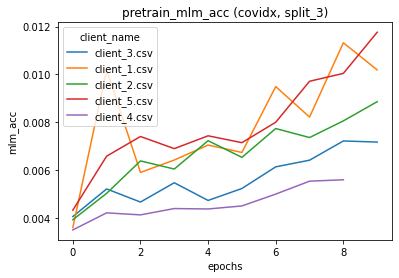

In [45]:
for client, acc in pretrain_acc.items():
    plt.plot(acc, label=client)
    plt.title(f'pretrain_mlm_acc ({own_data}, {split_style})')
    plt.ylabel('mlm_acc')
    plt.xlabel('epochs')
    plt.legend(title='client_name')

#### BEiT-FedAvg: own data SSL pretrained + finetune

In [46]:
class_acc = defaultdict(list)
with open(fedavg_prefix+cifar_path+f'finetune_{own_data}_epoch300_spilt_3_lr3e-3/log.txt') as f:
    for line in f:
        line = json.loads(line)
        # if line['epoch'] == 100:
        #      break
        class_acc[line['client']].append(line['train_class_acc'])

FileNotFoundError: [Errno 2] No such file or directory: '/data/yan/SSL_FL/fedavg_model_ckpt/cifar10_pretrained_beit_base/finetune_covidx_epoch300_spilt_3_lr3e-3/log.txt'

In [47]:
for client, acc in class_acc.items():
    plt.plot(acc, label=client)
    plt.title('finetune_acc (Retina, Split-3)')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend(title='client_name')

#### BEiT-FedAvg: train from scratch

In [51]:
# reading the data from the file
class_acc = defaultdict(list)
with open(fedavg_prefix+randn_path+f'{own_data}_finetune_epoch500_{split_style}_1.5e-3/log.txt') as f:
    for line in f:
        line = json.loads(line)
        class_acc[line['client']].append(line['train_class_acc'])

FileNotFoundError: [Errno 2] No such file or directory: '/data/yan/SSL_FL/fedavg_model_ckpt/random_init_beit_base/covidx_finetune_epoch500_split_3_3e-3/log.txt'

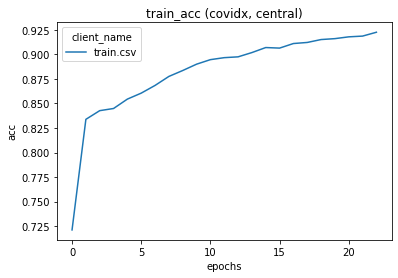

In [30]:
for client, acc in class_acc.items():
    plt.plot(acc, label=client)
    plt.title(f'train_acc ({own_data}, {split_style})')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend(title='client_name')

#### BEiT-FedAvg: IMNET pretrain + finetune

In [56]:
# reading the data from the file
class_acc = defaultdict(list)
with open(fedavg_prefix+imnet_path+f'{own_data}_finetune_epoch90_central_1.5e-3/log.txt') as f:
    for line in f:
        line = json.loads(line)
        class_acc[line['client']].append(line['train_class_acc'])

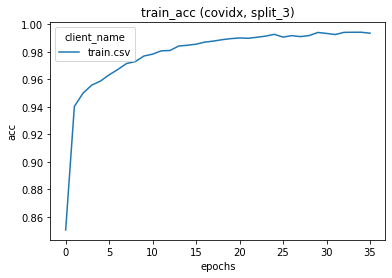

In [57]:
for client, acc in class_acc.items():
    plt.plot(acc, label=client)
    plt.title(f'train_acc ({own_data}, {split_style})')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend(title='client_name')